Vamos a empezar a explorar las bases de datos 

In [53]:
pip install sqldf

Note: you may need to restart the kernel to use updated packages.


# Tarea 1
A continuación se cargarán las bibliotecas que serán, muy probablemente, utilizadas. 

In [1]:
#import sqlite3
import sqldf
import pandas as pd
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd
from sklearn import linear_model

Ahora procedemos a cargar cada una de las bases del enunciado, iniciando los primeros pasos exploratorios. De manera general, se aplicará el mismo procedimiento a cada base y después, dependiendo de los datos que cada una presente, se observarán algunos tratamientos distintos. El procedimiento default corresponde a sacar, con info(), un resumen general de los tipos de datos que manejan las bases. Además, con sqldf se validará que no haya id's repetido si es el caso. 

In [68]:
ruta = "./data/"
bd = "base_ini_externa.txt"
bd_ini_externa = pd.read_csv(ruta+bd,sep=" ")
bd_ini_externa.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,NaN,NaN,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0


In [66]:
bd_ini_externa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   comp_externo1  47831 non-null  float64
 2   comp_externo2  44410 non-null  float64
 3   comp_externo3  49994 non-null  float64
 4   comp_externo4  50000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB


In [24]:
query ="""
       select distinct(_id_) as id
       from bd_ini_externa       
       """
len(sqldf.run(query))

50000

In [63]:
bd="base_ini_interna.csv"
bd_ini_interna = pd.read_csv(ruta+bd)
bd_ini_interna.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0


In [26]:
bd_ini_interna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   fecha_inicio   50000 non-null  object 
 2   comp_interno1  50000 non-null  float64
 3   comp_interno2  50000 non-null  object 
 4   comp_interno3  50000 non-null  float64
 5   comp_interno4  50000 non-null  float64
 6   categoria1     50000 non-null  float64
 7   categoria2     50000 non-null  float64
 8   categoria3     50000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [27]:
query ="""
       select distinct(_id_) as id
       from bd_ini_interna       
       """
len(sqldf.run(query))

50000

In [28]:
bd="base_ini_parte1.csv"
bd_ini_parte1 = pd.read_csv(ruta+bd)
bd_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [29]:
bd_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [30]:
bd="base_comportamiento_2.txt"
bd_comportamiento_2 = pd.read_csv(ruta+bd,sep=" ",low_memory=False)
bd_comportamiento_2.tail()
#categoria2, o 1 comportamiento de los clientes. 

,num_caso,mes_informacion,Tiempo_aparicion
1455531,98990,2021-05-01 00:00:00,1.0
1455532,98992,2021-04-01 00:00:00,0.0
1455533,98992,2021-05-01 00:00:00,1.0
1455534,98997,2021-04-01 00:00:00,0.0
1455535,98997,2021-05-01 00:00:00,1.0


In [31]:
bd_comportamiento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   Tiempo_aparicion  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [32]:
query ="""
       select distinct(num_caso) as id
       from bd_comportamiento_2       
       """
len(sqldf.run(query))

49352

Por ejemplo, esta base (bd_comportamiento_2) tiene un comportamiento peculiar. Parece ser que, en resumen, registra el tiempo desde que un caso (id) empieza un trámite. Sin embargo, existe una duda: ¿qué pasa si un caso inicia otro procedimiento en algún momento dado? ¿se vuelve a comenzar desde cero? La siguiente consulta está pensada para que nos dé esa información, además, en el proceso, se logra que sólo aparezcan los valores únicos de los números de casos:   

In [33]:
query ="""
       select num_caso,count(num_caso),max(Tiempo_aparicion) 
       from bd_comportamiento_2 group by num_caso       
       """
sqldf.run(query).head()

,num_caso,count(num_caso),max(Tiempo_aparicion)
0,1,62,61.0
1,7,29,28.0
2,8,63,51.0
3,9,15,14.0
4,10,16,15.0


La consulta indica que el máximo registro del tiempo no siempre es lo mismo que la cantidad de registros que tiene un caso dado (salvo por un número que se agrega por el cero) que es lo que se esperaría. Esto es un indicativo de que , en efecto, la base puede iniciar el registro de un mismo caso más adelante en el tiempo. La siguiente consulta dice cuántas veces un caso inició un proceso:  

In [34]:
query ="""
       select num_caso,count(Tiempo_aparicion) as cantidad_tramites 
       from bd_comportamiento_2 where Tiempo_aparicion=0 group by num_caso,Tiempo_aparicion        
       """
sqldf.run(query).head(20)

,num_caso,cantidad_tramites
0,1,1
1,7,1
2,8,5
3,9,1
4,10,1
5,14,1
6,18,1
7,21,1
8,22,1
9,24,1


In [35]:
bd="base_comportamiento_3.csv"
bd_comportamiento_3 = pd.read_csv(ruta+bd,low_memory=False)
bd_comportamiento_3.head()

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0
2,1,2016-06-01 00:00:00,0.0
3,1,2016-07-01 00:00:00,0.0
4,1,2016-08-01 00:00:00,0.0


In [36]:
bd_comportamiento_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   comportamiento_j  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [37]:
query ="""
       select distinct(num_caso) as id
       from bd_comportamiento_3      
       """
len(sqldf.run(query))

49352

In [38]:
bd="base_inversion.txt"
bd_base_inversion= pd.read_csv(ruta+bd,sep=" ")
bd_base_inversion.head()

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354


In [39]:
bd_base_inversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _id2_      17536 non-null  int64  
 1   inversion  17536 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 274.1 KB


In [40]:
query ="""
       select distinct(_id2_)
       from bd_base_inversion      
       """
len(sqldf.run(query))

17536

In [44]:
bd="base_ini_parte1.csv"
bd_ini_parte1= pd.read_csv(ruta+bd)
bd_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [45]:
bd_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [47]:
query ="""
       select distinct(_id_) as id
       from bd_ini_parte1      
       """
len(sqldf.run(query))

50000

In [48]:
query ="""
       select distinct(_id2_) as id
       from bd_ini_parte1      
       """
len(sqldf.run(query))

50000

In [ ]:
#EJERCICIO 2
#De la base data_schools obtener el error estándar con Bootstrap de las variables de la base. 
#Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.
#Grafique los histogramas de las correlaciones
#Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

In [2]:
ruta="C:\\Users\\vicky\\Documents\\1 Seminario Est\\fase1\\Tarea 1 rep\\HomeWork1_ML\\data\\"
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(ruta+bd)
bd_escuelas.head(10)

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
5,6,576,3.39
6,7,620,3.10
7,8,615,3.40
8,9,553,2.97
9,10,607,2.91


In [3]:
# Veamos que tan correlacionadas estan las 2 pruebas
X = bd_escuelas[["LSAT"]]
y = bd_escuelas[["GPA"]]

In [4]:
regresion = linear_model.LinearRegression()
regresion.fit(X, y)
Y_pred = regresion.predict(X) 
Y_pred

array([[3.2263713 ],
       [2.9270218 ],
       [3.06547095],
       [3.34236923],
       [3.1665014 ],
       [3.05424534],
       [3.21888757],
       [3.20017822],
       [2.96818236],
       [3.17024327],
       [2.9868917 ],
       [3.12908272],
       [3.2750156 ],
       [3.07295468],
       [3.37230418],
       [2.94573115],
       [3.14030832],
       [3.31617615],
       [3.2263713 ],
       [3.18521075],
       [2.94198928],
       [3.19643635],
       [3.24882252],
       [3.05050347],
       [3.37604605],
       [3.24508065],
       [3.17398514],
       [3.26378999],
       [3.0954059 ],
       [3.07295468],
       [3.16275953],
       [3.53320454],
       [2.68380033],
       [3.11037337],
       [3.06172908],
       [3.03927787],
       [3.20017822],
       [3.1665014 ],
       [3.1552758 ],
       [2.90082872],
       [3.12534085],
       [3.05050347],
       [3.04301973],
       [3.30869242],
       [2.93824741],
       [3.31243428],
       [3.3348855 ],
       [3.001

In [5]:
#Las y's estimadas mediante X las pasamos a una lista
y_estim=Y_pred.reshape(-1)
y_estim

array([3.2263713 , 2.9270218 , 3.06547095, 3.34236923, 3.1665014 ,
       3.05424534, 3.21888757, 3.20017822, 2.96818236, 3.17024327,
       2.9868917 , 3.12908272, 3.2750156 , 3.07295468, 3.37230418,
       2.94573115, 3.14030832, 3.31617615, 3.2263713 , 3.18521075,
       2.94198928, 3.19643635, 3.24882252, 3.05050347, 3.37604605,
       3.24508065, 3.17398514, 3.26378999, 3.0954059 , 3.07295468,
       3.16275953, 3.53320454, 2.68380033, 3.11037337, 3.06172908,
       3.03927787, 3.20017822, 3.1665014 , 3.1552758 , 2.90082872,
       3.12534085, 3.05050347, 3.04301973, 3.30869242, 2.93824741,
       3.31243428, 3.3348855 , 3.00185918, 3.17772701, 2.9756661 ,
       3.09166403, 3.06921282, 3.12159898, 3.12159898, 2.99437544,
       3.29746681, 2.81476574, 3.26004812, 3.13282458, 3.22262943,
       3.20766196, 3.28249933, 3.03927787, 3.18146888, 3.00185918,
       3.2750156 , 3.19643635, 2.94198928, 3.13656645, 3.39101353,
       3.03179413, 3.03179413, 3.16275953, 3.01308478, 3.46585

In [6]:
#Solo llamamos a las x's originales
x_ini=X.to_numpy().reshape(-1)
x_ini

array([622, 542, 579, 653, 606, 576, 620, 615, 553, 607, 558, 596, 635,
       581, 661, 547, 599, 646, 622, 611, 546, 614, 628, 575, 662, 627,
       608, 632, 587, 581, 605, 704, 477, 591, 578, 572, 615, 606, 603,
       535, 595, 575, 573, 644, 545, 645, 651, 562, 609, 555, 586, 580,
       594, 594, 560, 641, 512, 631, 597, 621, 617, 637, 572, 610, 562,
       635, 614, 546, 598, 666, 570, 570, 605, 565, 686, 608, 595, 590,
       558, 611, 564, 575], dtype=int64)

In [7]:
#Ahora las y's
y_ini=y.to_numpy().reshape(-1)
y_ini

array([3.23, 2.83, 3.24, 3.12, 3.09, 3.39, 3.1 , 3.4 , 2.97, 2.91, 3.11,
       3.24, 3.3 , 3.22, 3.43, 2.91, 3.23, 3.47, 3.15, 3.33, 2.99, 3.19,
       3.03, 3.01, 3.39, 3.41, 3.04, 3.29, 3.16, 3.17, 3.13, 3.36, 2.57,
       3.02, 3.03, 2.88, 3.37, 3.2 , 3.23, 2.98, 3.11, 2.92, 2.85, 3.38,
       2.76, 3.27, 3.36, 3.19, 3.17, 3.  , 3.11, 3.07, 2.96, 3.05, 2.93,
       3.28, 3.01, 3.21, 3.32, 3.24, 3.03, 3.33, 3.08, 3.13, 3.01, 3.3 ,
       3.15, 2.82, 3.2 , 3.44, 3.01, 2.92, 3.45, 3.15, 3.5 , 3.16, 3.19,
       3.15, 2.81, 3.16, 3.02, 2.74])

In [8]:
residual=y_ini-y_estim
residual

array([ 0.0036287 , -0.0970218 ,  0.17452905, -0.22236923, -0.0765014 ,
        0.33575466, -0.11888757,  0.19982178,  0.00181764, -0.26024327,
        0.1231083 ,  0.11091728,  0.0249844 ,  0.14704532,  0.05769582,
       -0.03573115,  0.08969168,  0.15382385, -0.0763713 ,  0.14478925,
        0.04801072, -0.00643635, -0.21882252, -0.04050347,  0.01395395,
        0.16491935, -0.13398514,  0.02621001,  0.0645941 ,  0.09704532,
       -0.03275953, -0.17320454, -0.11380033, -0.09037337, -0.03172908,
       -0.15927787,  0.16982178,  0.0334986 ,  0.0747242 ,  0.07917128,
       -0.01534085, -0.13050347, -0.19301973,  0.07130758, -0.17824741,
       -0.04243428,  0.0251145 ,  0.18814082, -0.00772701,  0.0243339 ,
        0.01833597,  0.00078718, -0.16159898, -0.07159898, -0.06437544,
       -0.01746681,  0.19523426, -0.05004812,  0.18717542,  0.01737057,
       -0.17766196,  0.04750067,  0.04072213, -0.05146888,  0.00814082,
        0.0249844 , -0.04643635, -0.12198928,  0.06343355,  0.04

In [9]:
# obtengamos el error estándar del estimador con la formula vista en clase (Sin bootstrap)

In [11]:
n=len(y_ini)
den=sum((x_ini-np.mean(x_ini))**2)
num=sum(residual**2)/(n)
err1=np.sqrt(num/den)
err1

0.0003533726122569552

In [12]:
#Calculemos el error estandar de las estimaciones de los parámetros haciendo bootstrap sobre los residuales

In [13]:
df = pd.DataFrame(residual,
                 columns=['residual'])
df["x"]=x_ini
df

,residual,x
0,0.003629,622
1,-0.097022,542
2,0.174529,579
3,-0.222369,653
4,-0.076501,606
...,...,...
77,0.043368,590
78,-0.176892,558
79,-0.025211,611
80,0.010657,564


In [14]:
#Aqui es donde hacemos el primer remuestreo bootstrap con la siguiente funcion
r_i=np.random.choice(residual,len(residual),replace=True)
df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
df_aux=pd.merge(df_aux, df, how="inner", on=["residual"])
df_aux

,residual,x
0,0.287240,605
1,0.287240,605
2,-0.260243,607
3,-0.260243,607
4,-0.032760,605
...,...,...
78,-0.071599,594
79,0.110917,596
80,0.174529,579
81,-0.161599,594


In [16]:
#Calculemos el error de este Remuestreo
x_j=df_aux[["x"]].to_numpy().reshape(-1)
den=sum((x_j-np.mean(x_j))**2)
num=sum(r_i**2)/(n)
err=np.sqrt(num/den)
err

0.00034795972751743606

In [40]:
#Nostoros queremos hacer este remuestro muchas veces y saber los errores
simul=2500
res_boost= np.array( [ ])
for i in range(0,simul):
    r_i=np.random.choice(residual,len(residual),replace=True)
    df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
    df_aux=pd.merge(df_aux, df, how="inner", on=["residual"])
    df_aux
    x_i=df_aux[["x"]].to_numpy().reshape(-1)
    den=sum((x_i-np.mean(x_i))**2)
    num=sum(r_i**2)/(n)
    err=np.sqrt(num/den)
    res_boost = np.append(res_boost,err)

In [41]:
#Este es el promedio de los Errores
np.mean(res_boost)

0.0003553051784448674

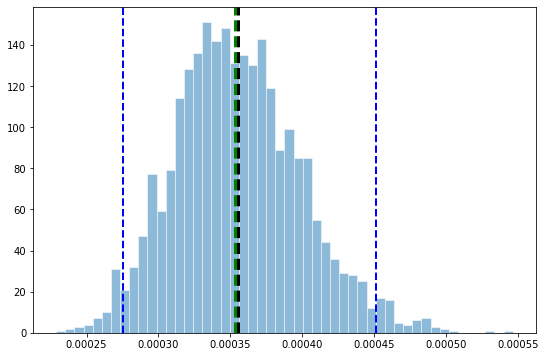

Error Estándar sin Bootsrap: 0.0003533726122569552
Promedio de Error Estándar de la muestras Bootstrap: 0.0003553051784448674
( 0.0002753380941393587 , 0.0004511196204562896 )


In [42]:
#Obtengamos el Histograma de los errores de las n muestras bootstrap
fig, ax = plt.subplots(figsize=(9,6))
hist(res_boost,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=err1,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(res_boost),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

axvline(percentile(res_boost,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(res_boost,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error Estándar sin Bootsrap:", err1)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost))
print("(", percentile(res_boost,2.5),",",percentile(res_boost,97.5),")")

In [ ]:
#El otro ejercicio que es con n-1

In [37]:
simul=2500
res_boost2= np.array( [ ])
for i in range(0,simul):
    r_i=np.random.choice(residual,len(residual)-1,replace=True)
    df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
    df_aux=pd.merge(df_aux, df, how="inner", on=["residual"])
    df_aux
    x_i=df_aux[["x"]].to_numpy().reshape(-1)
    den=sum((x_i-np.mean(x_i))**2)
    num=sum(r_i**2)/(n)
    err=np.sqrt(num/den)
    res_boost2 = np.append(res_boost2,err)

In [39]:
np.mean(res_boost2)

0.0003549222946618293

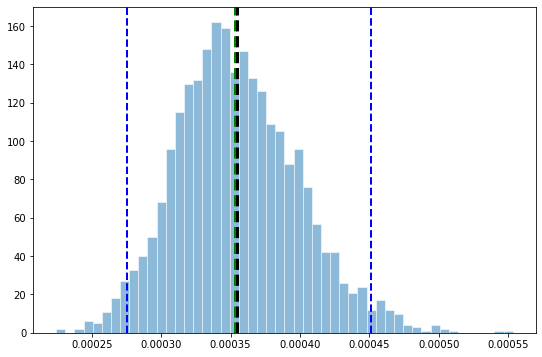

Error Estándar sin Bootsrap: 0.0003533726122569552
Promedio de Error Estándar de la muestras Bootstrap: 0.0003549222946618293
( 0.00027544455765841176 , 0.00045140198911585724 )


In [43]:
#Obtengamos el Histograma de los errores de las n-1 muestras bootstrap
fig, ax = plt.subplots(figsize=(9,6))
hist(res_boost2,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=err1,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(res_boost2),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

axvline(percentile(res_boost2,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(res_boost2,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error Estándar sin Bootsrap:", err1)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost2))
print("(", percentile(res_boost2,2.5),",",percentile(res_boost2,97.5),")")